Link do dataset: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset

In [34]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Análise exploratoria

In [35]:
df = pd.read_csv('input/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
# retirando a colunua 'RowNumber' por se apenas a contagem das linhas
df.drop('RowNumber', axis=1, inplace=True)

In [37]:
# verificando tipos de dados e quantidade de linhas/colunas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [38]:
# verificando dados faltantes
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Não temos valores nulos

In [39]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


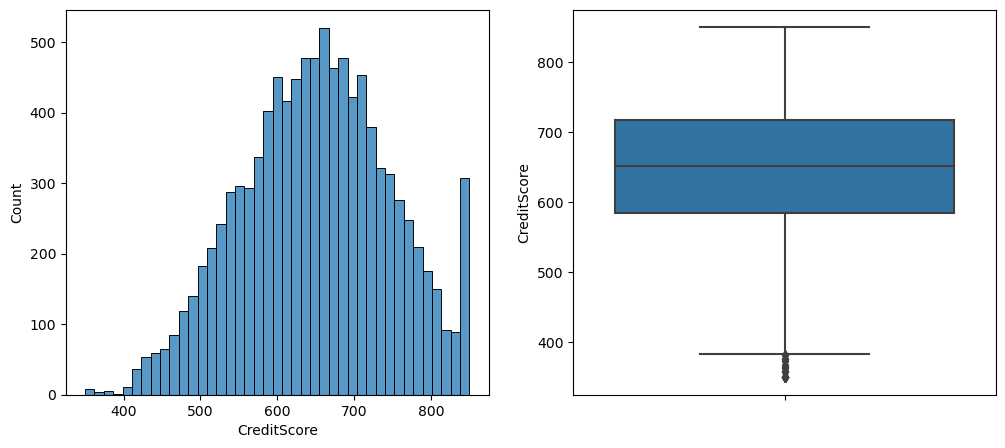

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df, x='CreditScore', ax=ax[0])
sns.boxplot(df, y='CreditScore', ax=ax[1]);

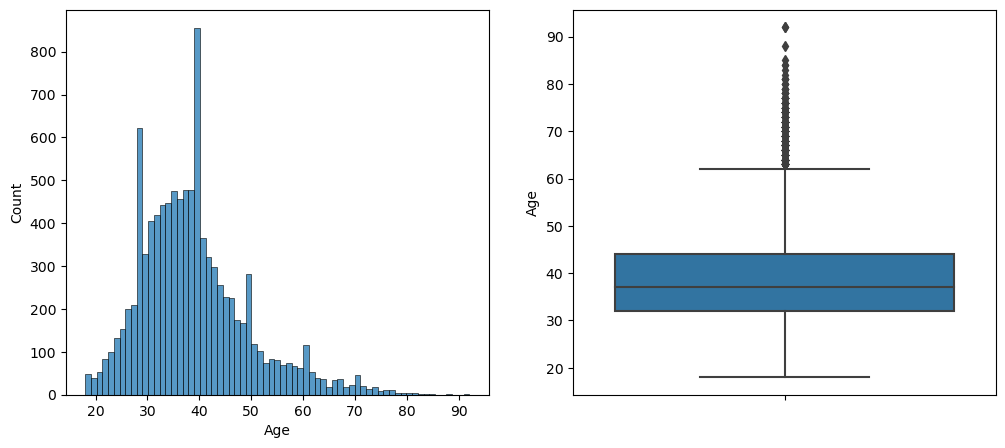

In [41]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df, x='Age', ax=ax[0])
sns.boxplot(df, y='Age', ax=ax[1]);

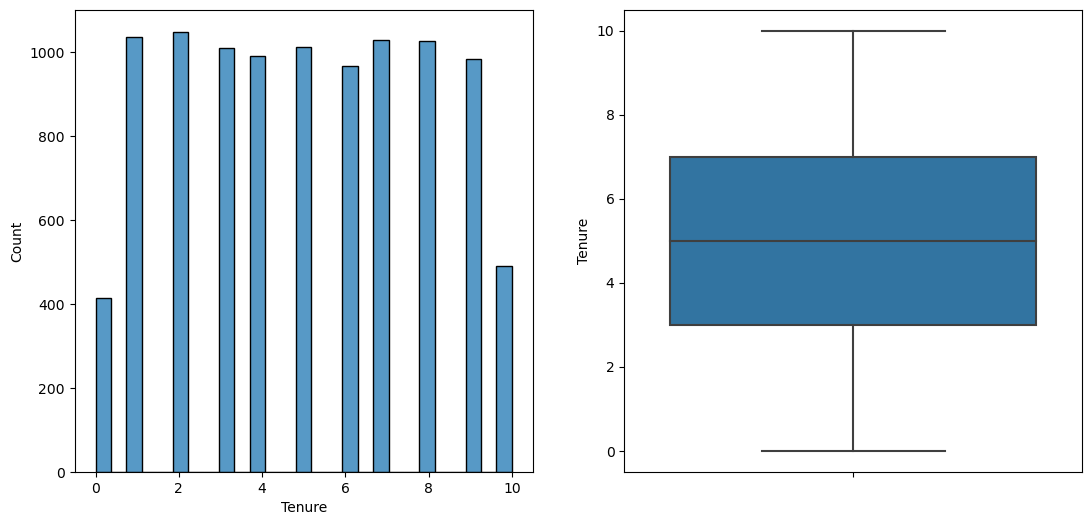

In [42]:
fig, ax = plt.subplots(1,2, figsize=(13,6))
sns.histplot(df, x='Tenure', ax=ax[0])
sns.boxplot(df, y = 'Tenure', ax=ax[1]);

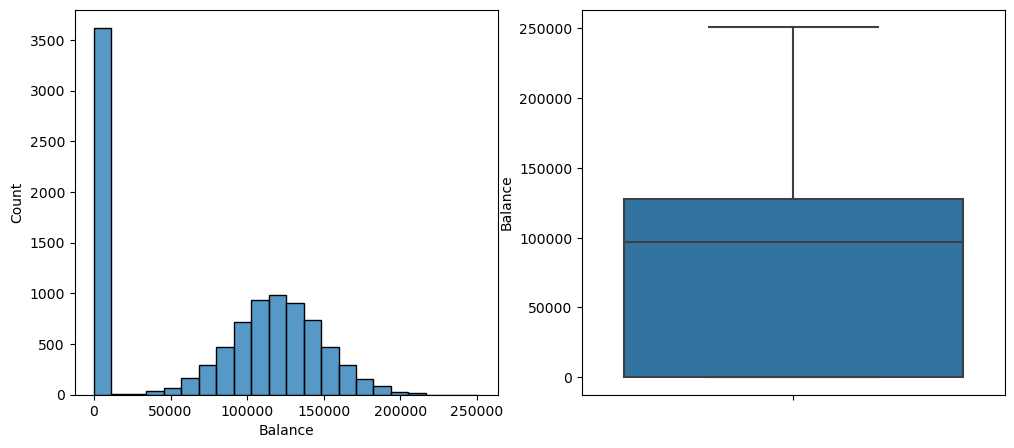

In [43]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df, x='Balance', ax=ax[0])
sns.boxplot(df, y = 'Balance', ax=ax[1]);

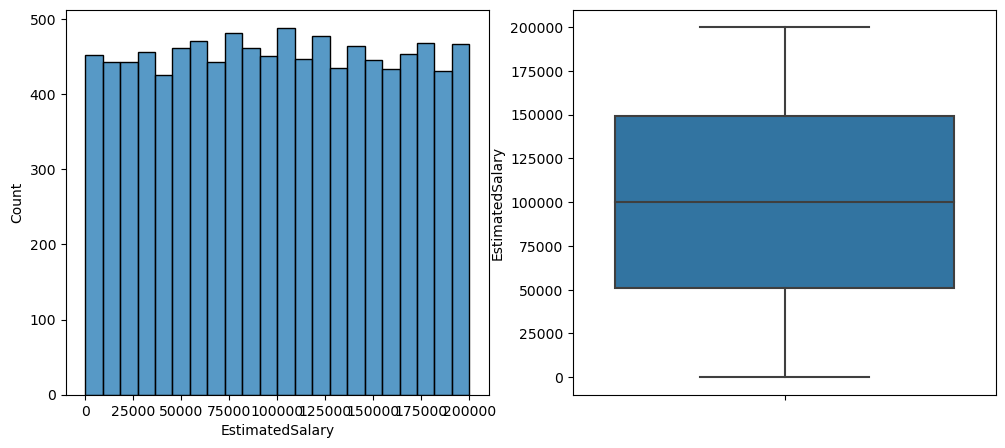

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df, x='EstimatedSalary', ax=ax[0]);
sns.boxplot(df, y = 'EstimatedSalary', ax=ax[1]);

HasCrCard
0    2945
1    7055
Name: count, dtype: int64


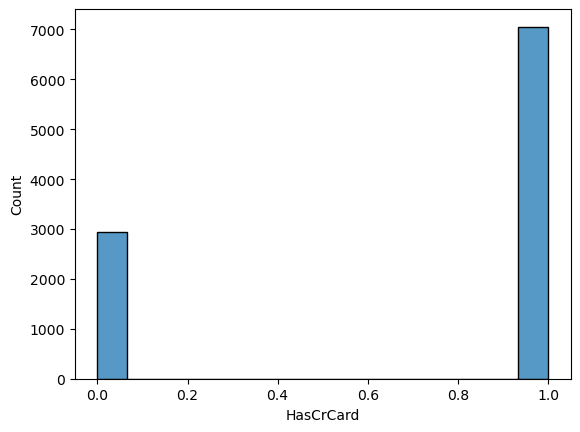

In [45]:
# quantidade de cliente que tem cartao
sns.histplot(df, x='HasCrCard')
print(df.HasCrCard.value_counts(ascending=True))

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


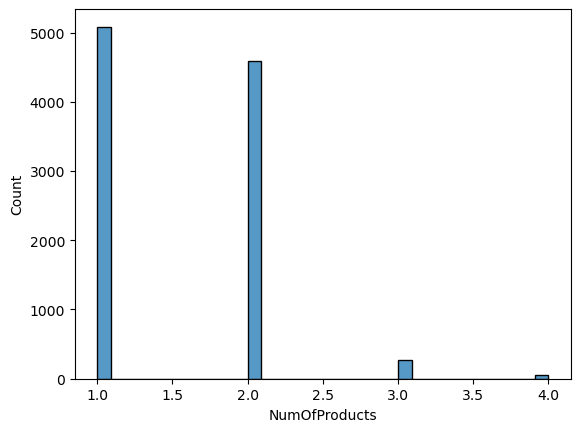

In [46]:
# numero de cliente por produto
sns.histplot(df, x='NumOfProducts')
print(df.NumOfProducts.value_counts())

IsActiveMember
0    4849
1    5151
Name: count, dtype: int64


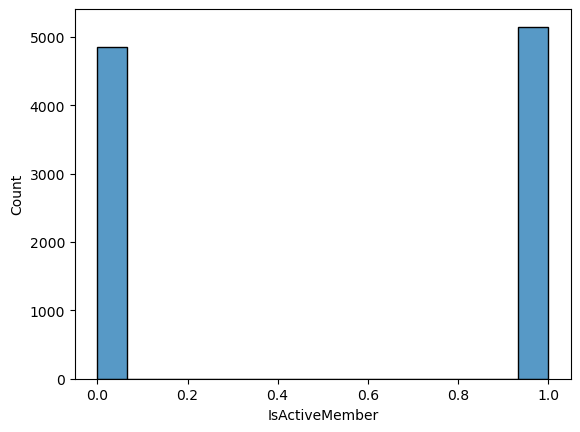

In [47]:
# quantidade de menbros ativos
sns.histplot(df, x='IsActiveMember')
print(df.IsActiveMember.value_counts(ascending=True))

Exited
0    7963
1    2037
Name: count, dtype: int64


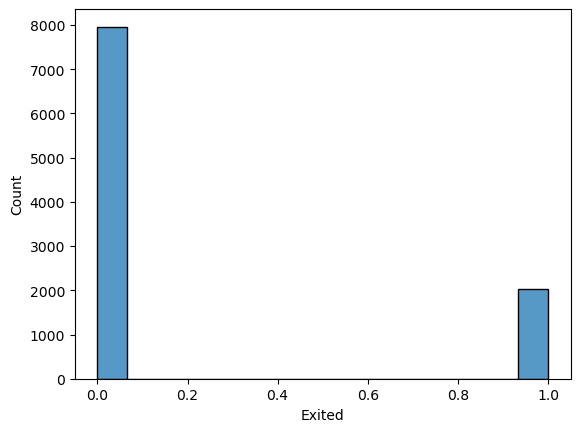

In [48]:
# quantas pessoas deram churn
sns.histplot(df, x = 'Exited')
print(df.Exited.value_counts())

## Modelagem

### Tratando dados para modelagem

In [49]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [50]:
# transformando em dummies a variavel 'Geography'
encoder = OneHotEncoder()
hot = encoder.fit_transform(df[['Geography']])
encoded_geography = pd.DataFrame(hot.toarray(), columns=encoder.get_feature_names_out())
encoded_geography

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [51]:
# transformando em dummies a variavel 'Gender'
hot = encoder.fit_transform(df[['Gender']])
encoded_gender = pd.DataFrame(hot.toarray(), columns=encoder.get_feature_names_out())
encoded_gender

,Gender_Female,Gender_Male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,1.0
9996,0.0,1.0
9997,1.0,0.0
9998,0.0,1.0


In [52]:
# criando o novo dataframe com as novas colunas e excluindo as antigas
df_novo = pd.concat([df.drop(['Gender', 'Geography'], axis=1), encoded_geography, encoded_gender], axis=1)

In [53]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_France   10000 non-null  float64
 12  Geography_Germany  10000 non-null  float64
 13  Geography_Spain    10000 non-null  float64
 14  Gender_Female      10000 non-null  float64
 15  Gender_Male        10000 non-null  float64
dtypes: float64(7), int64(8)

In [54]:
# Excluindo as colunas 'CustomerId' e 'Surname'
df_novo.drop(['CustomerId', 'Surname'], axis=1, inplace=True)
df_novo.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [55]:
# Separando as variaveis target e explicativas
x = df_novo.drop('Exited', axis=1)
y = df_novo['Exited']

In [56]:
normalizador = MinMaxScaler(feature_range=(0,1))
x_norm = normalizador.fit_transform(x)

In [57]:
# Encontrando os melhores parametros para o modelo
modelo = LogisticRegression()

valores_C = np.array([0.01,0.1,0.2,0.5,1,2,3,5,10,20,50,100])
regularizacao = ['l1', 'l2']
valores_grid = {'C': valores_C, 'penalty': regularizacao}

stkfold = StratifiedKFold(n_splits=5)

grid = GridSearchCV(estimator= modelo, param_grid= valores_grid, cv=stkfold)
grid.fit(x_norm,y)

print('O melhor score foi: ', grid.best_score_)
print('O melhor valor C foi: ', grid.best_estimator_.C)
print('O melhor regularização foi: ', grid.best_estimator_.penalty)

O melhor score foi:  0.8116
O melhor valor C foi:  0.1
O melhor regularização foi:  l2


### Modelagem

In [58]:
# Separando treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x_norm, y, test_size=0.2, random_state=123)

In [59]:
modelo = LogisticRegression(C=0.1, penalty='l2')
modelo.fit(x_treino, y_treino)
modelo.score(x_teste, y_teste)

0.8135

In [60]:
y_pred = modelo.predict(x_teste)

In [61]:
matrix = confusion_matrix(y_teste, y_pred, labels=modelo.classes_)

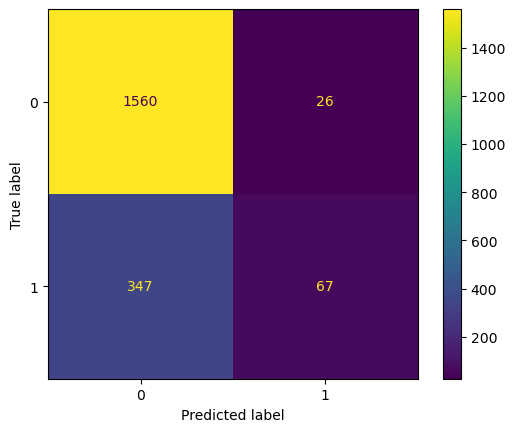

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=modelo.classes_)
disp.plot();

In [63]:
predicoes = modelo.predict_proba(x_teste)
probs = predicoes[:,1]

fpr, tpr, threshold = roc_curve(y_teste, probs)

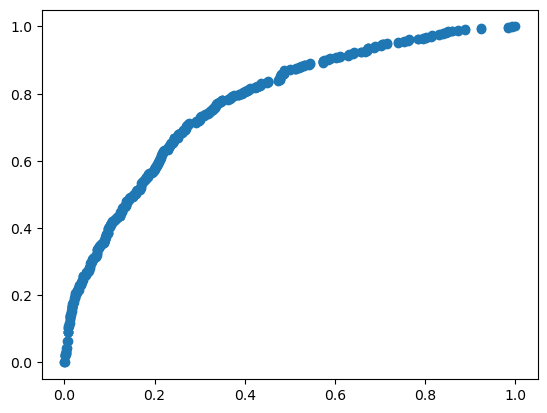

In [64]:
plt.scatter(fpr, tpr)

In [65]:
print(roc_auc_score(y_teste, probs))

0.7768822608451974
